ML PROJECT   

Project Title - Fuel Efficiency Estimation Based on Engine and Design Features


Dataset: US Vehicle Fuel Economy Data

Name: Poush Makade

Roll: A4-59

In [4]:
!pip install numpy pandas scikit-learn matplotlib seaborn xgboost joblib streamlit



   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------- ----------------------- 3.4/8.1 MB 19.3 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 12.3 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 9.1 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 8.0 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.3 MB 3.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.3 MB 3.5 MB/s eta 0:00:01
   ------------------------------------- -- 2.1/2.3 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 3.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


IMPORTING ESSENTIAL LIBRARIES-


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import joblib


Matplotlib is building the font cache; this may take a moment.


LOADING THE DATASET

In [6]:
df = pd.read_csv('Vehicle Fuel Economy Data.csv')
df.head()

C:\Users\POUSH MAKADE\AppData\Local\Temp\ipykernel_55508\3827069079.py:1: DtypeWarning: Columns (73,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Vehicle Fuel Economy Data.csv')


,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,09-09-2016,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,22-11-2016,Y,0.0,0.0,0.0
2,2016,Infiniti,Q50S Red Sport,13.523182,0.0,0.0,20.0,19.0,0.0,0.0,...,NSX,NaN,0.0,NaN,04-04-2016,26-09-2016,N,0.0,0.0,0.0
3,2017,MINI,John Cooper Works Convertible,11.018889,0.0,0.0,24.0,23.0,0.0,0.0,...,BMX,NaN,0.0,NaN,12-04-2016,16-09-2016,Y,0.0,0.0,0.0
4,2017,Kia,Sedona SX,14.167143,0.0,0.0,18.0,18.0,0.0,0.0,...,KMX,NaN,0.0,NaN,12-04-2016,02-12-2016,N,0.0,0.0,0.0


EXPLORATORY DATA ANALYSIS

In [7]:
df.shape
df.info()
df.describe()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46186 entries, 0 to 46185
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             46186 non-null  int64  
 1   Manufacturer     46186 non-null  object 
 2   Model            46176 non-null  object 
 3   barrels08        46169 non-null  float64
 4   barrelsA08       46169 non-null  float64
 5   charge240        46169 non-null  float64
 6   city08           46169 non-null  float64
 7   city08U          46169 non-null  float64
 8   cityA08          46169 non-null  float64
 9   cityA08U         46169 non-null  float64
 10  cityCD           46169 non-null  float64
 11  cityE            46169 non-null  float64
 12  cityUF           46169 non-null  float64
 13  co2              46169 non-null  float64
 14  co2A             46169 non-null  float64
 15  co2TailpipeAGpm  46169 non-null  float64
 16  co2TailpipeGpm   46169 non-null  float64
 17  comb08      

Year                0
Manufacturer        0
Model              10
barrels08          17
barrelsA08         17
                ...  
modifiedOn       2016
startStop       31829
phevCity         2016
phevHwy          2016
phevComb         2016
Length: 82, dtype: int64

In [8]:
print(df.columns.tolist())



['Year', 'Manufacturer', 'Model', 'barrels08', 'barrelsA08', 'charge240', 'city08', 'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders', 'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08', 'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'VClass', 'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA', 'UHighway', 'UHighwayA', 'youSaveSpend', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop', 'phevCity', 'phevHwy', 'phevComb']


In [9]:

print("Goal: Predict combined fuel efficiency (MPG) based on engine and design features.")


df.rename(columns={'comb08': 'mpg', 'displ': 'displacement', 'Year': 'model_year'}, inplace=True)


selected_cols = ['mpg', 'cylinders', 'displacement', 'fuelType1',
                 'trany', 'VClass', 'drive', 'fuelCost08', 'model_year']

available_cols = [col for col in selected_cols if col in df.columns]
missing_cols = [col for col in selected_cols if col not in df.columns]

df = df[available_cols]

print("Columns kept for modeling:")
print(df.columns.tolist())

if missing_cols:
    print("\n Missing columns skipped:", missing_cols)

print("\nDataset shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())


corr = df.corr(numeric_only=True)['mpg'].sort_values(ascending=False)
print("\nCorrelation with mpg:\n", corr)


Goal: Predict combined fuel efficiency (MPG) based on engine and design features.
Columns kept for modeling:
['mpg', 'cylinders', 'displacement', 'fuelType1', 'trany', 'VClass', 'drive', 'fuelCost08', 'model_year']

Dataset shape: (46186, 9)

Missing values per column:
 mpg               17
cylinders        523
displacement     521
fuelType1       1233
trany           2005
VClass          1233
drive           1203
fuelCost08      1233
model_year         0
dtype: int64

Correlation with mpg:
 mpg             1.000000
model_year      0.249435
fuelCost08     -0.680607
cylinders      -0.682115
displacement   -0.724576
Name: mpg, dtype: float64


#HANDLING MISSING AND DUPLICATE VALUES


In [10]:
df = df.drop_duplicates()
df = df.dropna(subset=['mpg'])  # target must not be missing
df.fillna(df.median(numeric_only=True), inplace=True)


VISUALIZATION

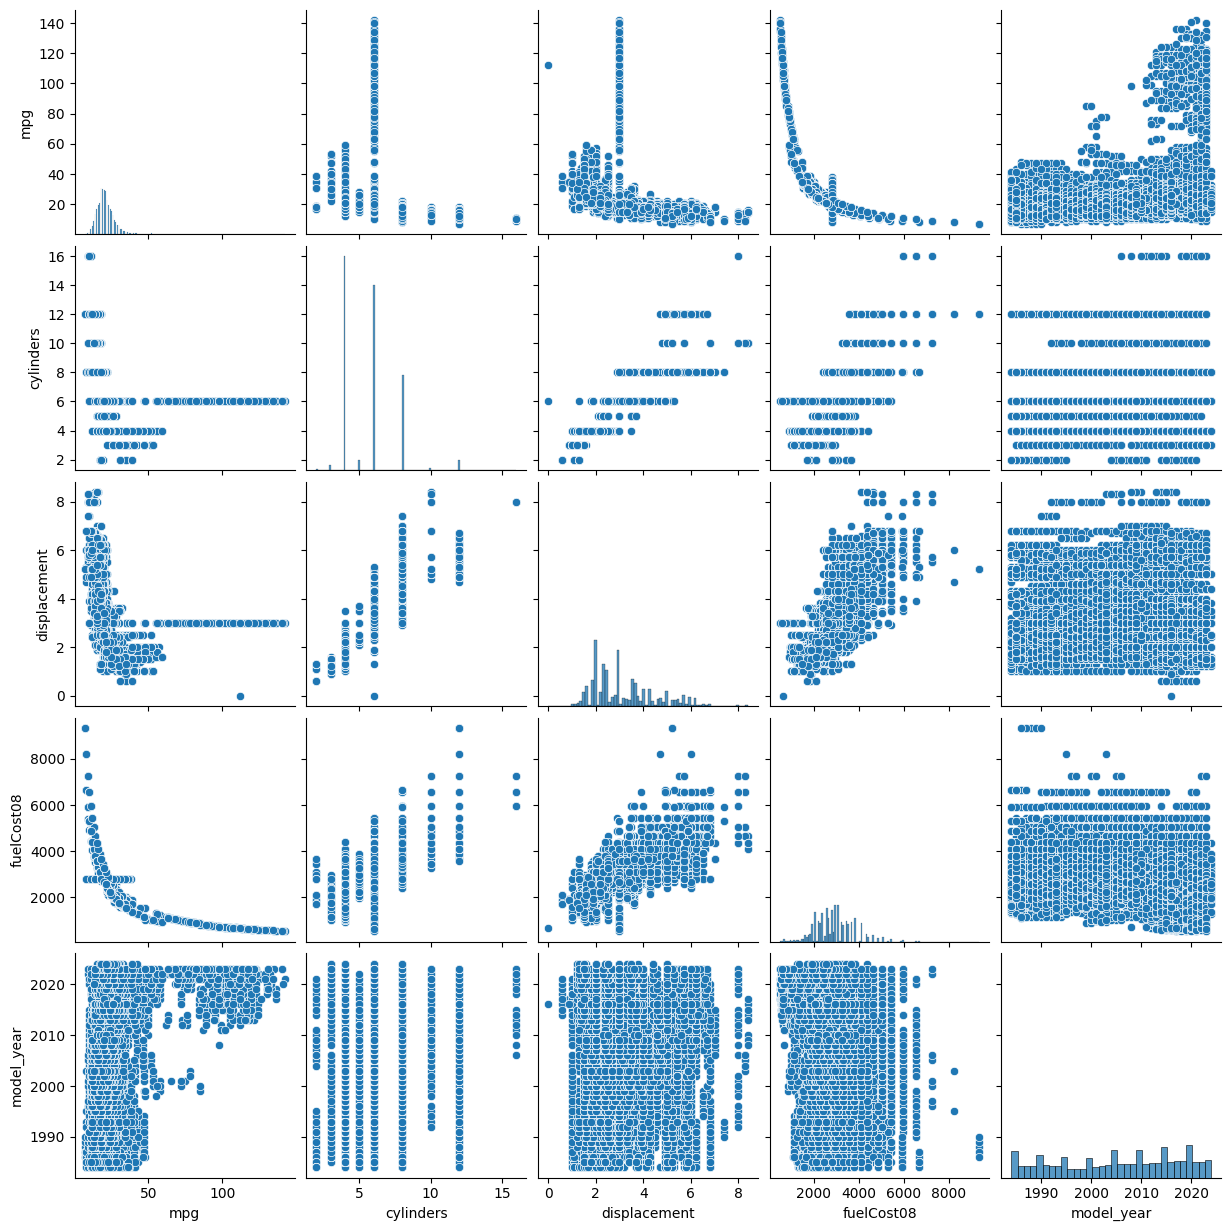

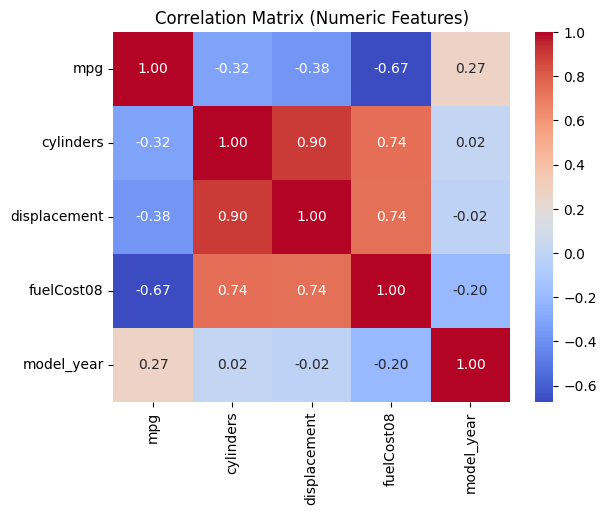

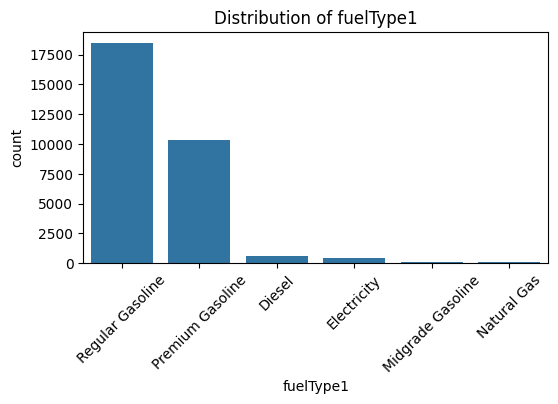

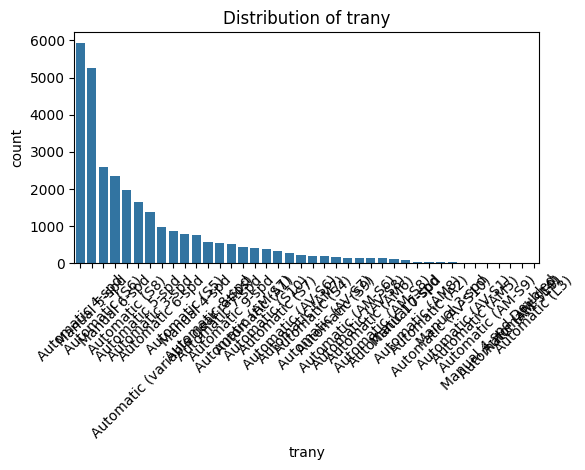

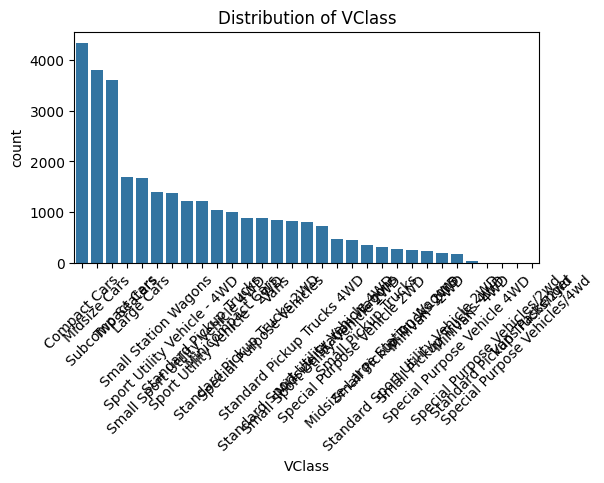

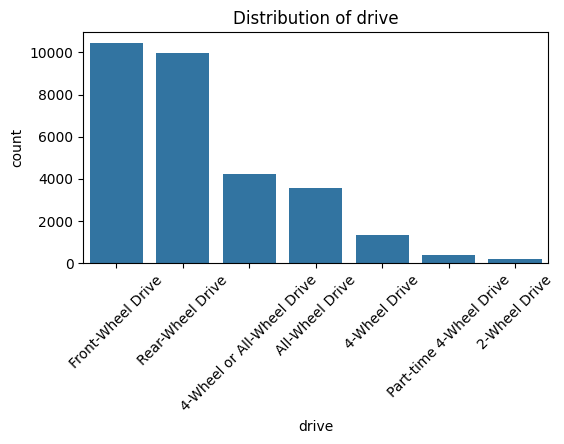

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for numeric features
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

# Correlation Heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# Optional: Categorical feature distributions
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


*Feature Selection / Preprocessing*

In [12]:
target = 'mpg'
X = df.drop(columns=[target])
y = df[target]

numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object','category']).columns

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


TRAIN/TEST SPLIT

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MODEL TRAINING  AND COMPARISON

In [14]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, eval_metric='rmse'),
    'SVR': SVR()
}

results = []
for name, model in models.items():
    pipe = Pipeline([('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results.append((name, rmse, r2))
    print(f"{name}: RMSE={rmse:.2f}, R2={r2:.3f}")



LinearRegression: RMSE=3.09, R2=0.921
Ridge: RMSE=3.09, R2=0.922
Lasso: RMSE=7.72, R2=0.510
RandomForest: RMSE=0.41, R2=0.999
GradientBoosting: RMSE=0.56, R2=0.997
XGBoost: RMSE=0.41, R2=0.999
SVR: RMSE=1.90, R2=0.970


COMPARISON

In [15]:
res_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R2'])
res_df.sort_values(by='RMSE')


,Model,RMSE,R2
3,RandomForest,0.405885,0.998644
5,XGBoost,0.410107,0.998616
4,GradientBoosting,0.555225,0.997463
6,SVR,1.904668,0.970145
1,Ridge,3.086049,0.921624
0,LinearRegression,3.089394,0.921454
2,Lasso,7.717948,0.509789


HYPERPARAMETER TUNING

In [16]:
rf_pipe = Pipeline([('preprocessor', preprocessor),
                    ('model', RandomForestRegressor(random_state=42))])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20]
}

grid = GridSearchCV(rf_pipe, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best RMSE:", -grid.best_score_)

best_model = grid.best_estimator_


Best Parameters: {'model__max_depth': 20, 'model__n_estimators': 200}
Best RMSE: 0.5322959434469076


FINAL EVALUATION AND SAVING THE MODEL

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.3f}")


Final RMSE: 0.40
MAE: 0.06
R2 Score: 0.999


Visualization of Predictions

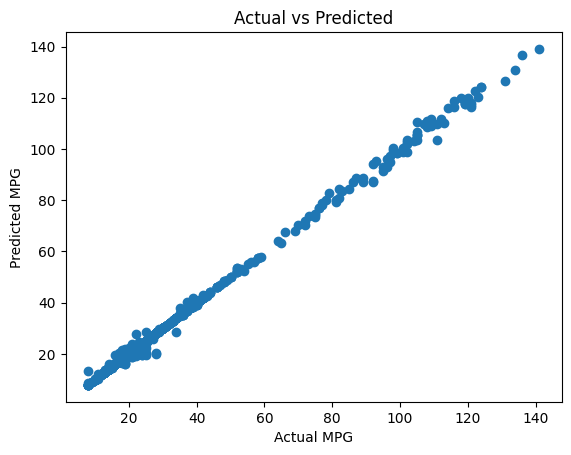

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted")
plt.show()


In [23]:
import joblib

# assuming best_model is your final trained model (XGBoost, RandomForest, etc.)
joblib.dump(best_model, 'best_model.joblib')
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [22]:
!ls


ML_PROJECT_A4_59.ipynb
Vehicle Fuel Economy Data.csv
best_model.joblib
streamlit_app.py
